In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
stores = pd.read_csv('c:/Users/Hp/Downloads/stores_data_set (1).csv')
features = pd.read_csv('c:/Users/Hp/Downloads/Features_data_set (1).csv')
sales = pd.read_csv('c:/Users/Hp/Downloads/sales_data_set (1).csv')

In [3]:
print(stores.head())

   Store Type    Size
0      1    A  151315
1      2    A  202307
2      3    B   37392
3      4    A  205863
4      5    B   34875


In [4]:
stores.isnull().sum()

Store    0
Type     0
Size     0
dtype: int64

In [5]:
print(features.head())

   Store        Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
0      1  05/02/2010        42.31       2.572        NaN        NaN   
1      1  12/02/2010        38.51       2.548        NaN        NaN   
2      1  19/02/2010        39.93       2.514        NaN        NaN   
3      1  26/02/2010        46.63       2.561        NaN        NaN   
4      1  05/03/2010        46.50       2.625        NaN        NaN   

   MarkDown3  MarkDown4  MarkDown5         CPI  Unemployment  IsHoliday  
0        NaN        NaN        NaN  211.096358         8.106      False  
1        NaN        NaN        NaN  211.242170         8.106       True  
2        NaN        NaN        NaN  211.289143         8.106      False  
3        NaN        NaN        NaN  211.319643         8.106      False  
4        NaN        NaN        NaN  211.350143         8.106      False  


In [6]:
features.isnull().sum()

Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64

In [7]:
print(sales.head())

   Store  Dept        Date  Weekly_Sales  IsHoliday
0      1     1  05/02/2010      24924.50      False
1      1     1  12/02/2010      46039.49       True
2      1     1  19/02/2010      41595.55      False
3      1     1  26/02/2010      19403.54      False
4      1     1  05/03/2010      21827.90      False


In [8]:
sales.isnull().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64

In [9]:
features['Date'] = pd.to_datetime(features['Date'], format="%d/%m/%Y")
sales['Date'] = pd.to_datetime(sales['Date'], format="%d/%m/%Y")

In [10]:
data= pd.merge(sales, features, on=['Store' , 'Date'],how='left')

In [11]:
data.head(5)

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [12]:
pd_data= pd.merge(data, stores, on='Store',how='left')

In [13]:
pd_data.tail(5)

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y,Type,Size
421565,45,98,2012-09-28,508.37,False,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684,False,B,118221
421566,45,98,2012-10-05,628.10,False,64.89,3.985,5046.74,NaN,18.82,2253.43,2340.01,192.170412,8.667,False,B,118221
421567,45,98,2012-10-12,1061.02,False,54.47,4.000,1956.28,NaN,7.89,599.32,3990.54,192.327265,8.667,False,B,118221
421568,45,98,2012-10-19,760.01,False,56.47,3.969,2004.02,NaN,3.18,437.73,1537.49,192.330854,8.667,False,B,118221
421569,45,98,2012-10-26,1076.80,False,58.85,3.882,4018.91,58.08,100.00,211.94,858.33,192.308899,8.667,False,B,118221


In [14]:
pd_data['Year'] = pd_data['Date'].dt.year
pd_data['Month'] = pd_data['Date'].dt.month
pd_data['Week'] = pd_data['Date'].dt.isocalendar().week

In [17]:
pd_data.head(5)

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y,Type,Size,Year,Month,Week
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315,2010,2,5
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True,A,151315,2010,2,6
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False,A,151315,2010,2,7
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False,A,151315,2010,2,8
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False,A,151315,2010,3,9


In [16]:
pd_data.shape

(421570, 20)

In [18]:
pd_data[pd_data["Weekly_Sales"]<=0]

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y,Type,Size,Year,Month,Week
846,1,6,2012-08-10,-139.65,False,85.05,3.494,11436.22,245.0,6.85,6964.26,4836.22,221.958433,6.908,False,A,151315,2012,8,32
2384,1,18,2012-05-04,-1.27,False,75.55,3.749,21290.13,NaN,69.89,4977.35,3261.04,221.671800,7.143,False,A,151315,2012,5,18
6048,1,47,2010-02-19,-863.00,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False,A,151315,2010,2,7
6049,1,47,2010-03-12,-698.00,False,57.79,2.667,NaN,NaN,NaN,NaN,NaN,211.380643,8.106,False,A,151315,2010,3,10
6051,1,47,2010-10-08,-58.00,False,63.93,2.633,NaN,NaN,NaN,NaN,NaN,211.746754,7.838,False,A,151315,2010,10,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
419597,45,80,2010-02-12,-0.43,True,27.73,2.773,NaN,NaN,NaN,NaN,NaN,181.982317,8.992,True,B,118221,2010,2,6
419598,45,80,2010-02-19,-0.27,False,31.27,2.745,NaN,NaN,NaN,NaN,NaN,182.034782,8.992,False,B,118221,2010,2,7
419603,45,80,2010-04-16,-1.61,False,54.28,2.899,NaN,NaN,NaN,NaN,NaN,181.692477,8.899,False,B,118221,2010,4,15
419614,45,80,2010-07-02,-0.27,False,76.61,2.815,NaN,NaN,NaN,NaN,NaN,182.318780,8.743,False,B,118221,2010,7,26


In [19]:
pd_data.describe()

,Store,Dept,Date,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size,Year,Month,Week
count,421570.000000,421570.000000,421570,421570.000000,421570.000000,421570.000000,150681.000000,111248.000000,137091.000000,134967.000000,151432.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.0
mean,22.200546,44.260317,2011-06-18 08:30:31.963375104,15981.258123,60.090059,3.361027,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,171.201947,7.960289,136727.915739,2010.968591,6.449510,25.826762
min,1.000000,1.000000,2010-02-05 00:00:00,-4988.940000,-2.060000,2.472000,0.270000,-265.760000,-29.100000,0.220000,135.160000,126.064000,3.879000,34875.000000,2010.000000,1.000000,1.0
25%,11.000000,18.000000,2010-10-08 00:00:00,2079.650000,46.680000,2.933000,2240.270000,41.600000,5.080000,504.220000,1878.440000,132.022667,6.891000,93638.000000,2010.000000,4.000000,14.0
50%,22.000000,37.000000,2011-06-17 00:00:00,7612.030000,62.090000,3.452000,5347.450000,192.000000,24.600000,1481.310000,3359.450000,182.318780,7.866000,140167.000000,2011.000000,6.000000,26.0
75%,33.000000,74.000000,2012-02-24 00:00:00,20205.852500,74.280000,3.738000,9210.900000,1926.940000,103.990000,3595.040000,5563.800000,212.416993,8.572000,202505.000000,2012.000000,9.000000,38.0
max,45.000000,99.000000,2012-10-26 00:00:00,693099.360000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000,219622.000000,2012.000000,12.000000,52.0
std,12.785297,30.492054,NaN,22711.183519,18.447931,0.458515,8291.221345,9475.357325,9623.078290,6292.384031,5962.887455,39.159276,1.863296,60980.583328,0.796876,3.243217,14.151887


In [21]:
pd_data["IsHoliday_x"]= pd_data["IsHoliday_x"].map({False:0, True:1})
pd_data["Type"]= pd_data["Type"].map({"A":0,"B":1,"C":2})

In [22]:
pd_data

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y,Type,Size,Year,Month,Week
0,1,1,2010-02-05,24924.50,0,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,0,151315,2010,2,5
1,1,1,2010-02-12,46039.49,1,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True,0,151315,2010,2,6
2,1,1,2010-02-19,41595.55,0,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False,0,151315,2010,2,7
3,1,1,2010-02-26,19403.54,0,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False,0,151315,2010,2,8
4,1,1,2010-03-05,21827.90,0,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False,0,151315,2010,3,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,0,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684,False,1,118221,2012,9,39
421566,45,98,2012-10-05,628.10,0,64.89,3.985,5046.74,NaN,18.82,2253.43,2340.01,192.170412,8.667,False,1,118221,2012,10,40
421567,45,98,2012-10-12,1061.02,0,54.47,4.000,1956.28,NaN,7.89,599.32,3990.54,192.327265,8.667,False,1,118221,2012,10,41
421568,45,98,2012-10-19,760.01,0,56.47,3.969,2004.02,NaN,3.18,437.73,1537.49,192.330854,8.667,False,1,118221,2012,10,42


In [23]:
pd_data[pd_data["Weekly_Sales"]<=0]

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y,Type,Size,Year,Month,Week
846,1,6,2012-08-10,-139.65,0,85.05,3.494,11436.22,245.0,6.85,6964.26,4836.22,221.958433,6.908,False,0,151315,2012,8,32
2384,1,18,2012-05-04,-1.27,0,75.55,3.749,21290.13,NaN,69.89,4977.35,3261.04,221.671800,7.143,False,0,151315,2012,5,18
6048,1,47,2010-02-19,-863.00,0,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False,0,151315,2010,2,7
6049,1,47,2010-03-12,-698.00,0,57.79,2.667,NaN,NaN,NaN,NaN,NaN,211.380643,8.106,False,0,151315,2010,3,10
6051,1,47,2010-10-08,-58.00,0,63.93,2.633,NaN,NaN,NaN,NaN,NaN,211.746754,7.838,False,0,151315,2010,10,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
419597,45,80,2010-02-12,-0.43,1,27.73,2.773,NaN,NaN,NaN,NaN,NaN,181.982317,8.992,True,1,118221,2010,2,6
419598,45,80,2010-02-19,-0.27,0,31.27,2.745,NaN,NaN,NaN,NaN,NaN,182.034782,8.992,False,1,118221,2010,2,7
419603,45,80,2010-04-16,-1.61,0,54.28,2.899,NaN,NaN,NaN,NaN,NaN,181.692477,8.899,False,1,118221,2010,4,15
419614,45,80,2010-07-02,-0.27,0,76.61,2.815,NaN,NaN,NaN,NaN,NaN,182.318780,8.743,False,1,118221,2010,7,26


In [24]:
pd_data["Weekly_Sales"]=pd_data["Weekly_Sales"].apply(lambda x: np.nan if x<=0 else x)

In [25]:
pd_data.isnull().sum()

Store                0
Dept                 0
Date                 0
Weekly_Sales      1358
IsHoliday_x          0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
IsHoliday_y          0
Type                 0
Size                 0
Year                 0
Month                0
Week                 0
dtype: int64

In [26]:
pd_data["Markdown"]=pd_data[["MarkDown1","MarkDown2","MarkDown3","MarkDown4","MarkDown5"]].notnull().any(axis=1)

In [27]:
pd_data['Markdown']

0         False
1         False
2         False
3         False
4         False
          ...  
421565     True
421566     True
421567     True
421568     True
421569     True
Name: Markdown, Length: 421570, dtype: bool

In [28]:
pd_data["Markdown"]=pd_data["Markdown"].map({True:1,False:0})

In [29]:
pd_data.groupby("Markdown")["Weekly_Sales"].mean()

Markdown
0    15922.137810
1    16231.116041
Name: Weekly_Sales, dtype: float64

In [34]:
pd_data.dtypes

Store                    int64
Dept                     int64
Date            datetime64[ns]
Weekly_Sales           float64
IsHoliday_x              int64
Temperature            float64
Fuel_Price             float64
MarkDown1              float64
MarkDown2              float64
MarkDown3              float64
MarkDown4              float64
MarkDown5              float64
CPI                    float64
Unemployment           float64
IsHoliday_y               bool
Type                     int64
Size                     int64
Year                     int32
Month                    int32
Week                    UInt32
Markdown                 int64
dtype: object

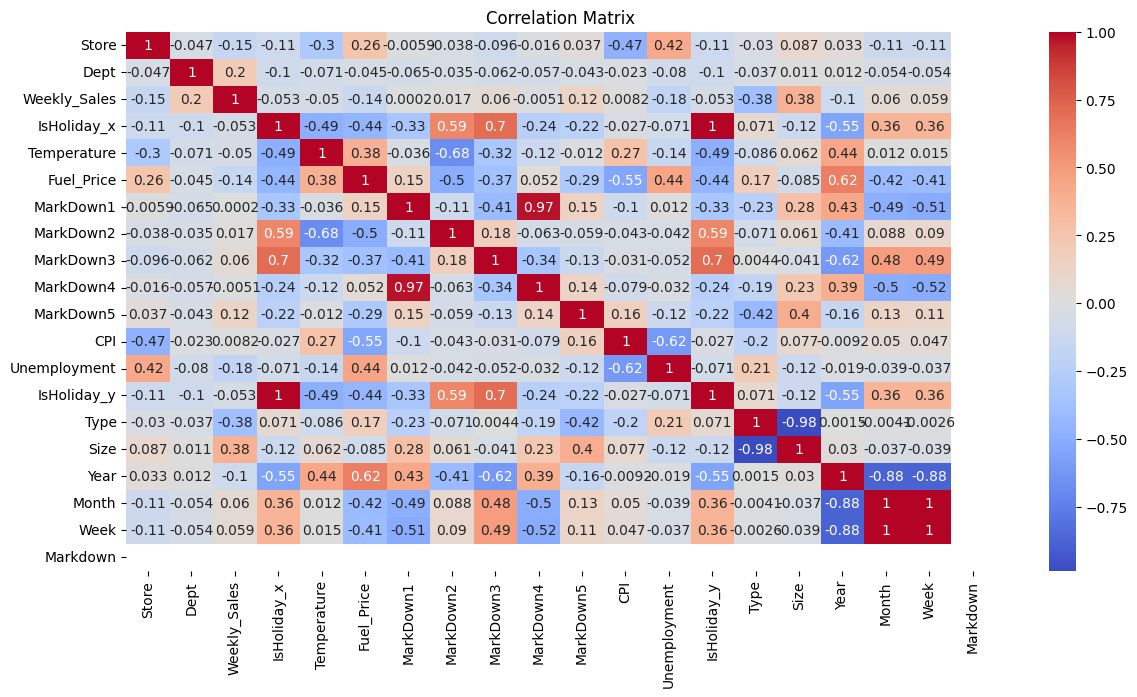

In [36]:
data_corr = pd_data.drop(columns=['Date']).dropna().corr()
plt.figure(figsize=(14, 7))
sns.heatmap(data_corr.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [37]:
pd_data["differ"]=pd_data["Week"].astype(str)+pd_data["Month"].astype(str)+pd_data["Year"].astype(str)+"-"+pd_data["Store"].astype(str)+"-"+pd_data["Dept"].astype(str)

In [38]:
pd_data.isnull().sum()

Store                0
Dept                 0
Date                 0
Weekly_Sales      1358
IsHoliday_x          0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
IsHoliday_y          0
Type                 0
Size                 0
Year                 0
Month                0
Week                 0
Markdown             0
differ               0
dtype: int64

In [39]:
pd_data['differ']

0             522010-1-1
1             622010-1-1
2             722010-1-1
3             822010-1-1
4             932010-1-1
               ...      
421565     3992012-45-98
421566    40102012-45-98
421567    41102012-45-98
421568    42102012-45-98
421569    43102012-45-98
Name: differ, Length: 421570, dtype: object

In [40]:
pd_data.nunique()

Store               45
Dept                81
Date               143
Weekly_Sales    358785
IsHoliday_x          2
Temperature       3528
Fuel_Price         892
MarkDown1         2277
MarkDown2         1499
MarkDown3         1662
MarkDown4         1944
MarkDown5         2293
CPI               2145
Unemployment       349
IsHoliday_y          2
Type                 3
Size                40
Year                 3
Month               12
Week                52
Markdown             2
differ          421570
dtype: int64

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
import pickle

In [42]:
pd_data.head(5)

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,...,CPI,Unemployment,IsHoliday_y,Type,Size,Year,Month,Week,Markdown,differ
0,1,1,2010-02-05,24924.50,0,42.31,2.572,NaN,NaN,NaN,...,211.096358,8.106,False,0,151315,2010,2,5,0,522010-1-1
1,1,1,2010-02-12,46039.49,1,38.51,2.548,NaN,NaN,NaN,...,211.242170,8.106,True,0,151315,2010,2,6,0,622010-1-1
2,1,1,2010-02-19,41595.55,0,39.93,2.514,NaN,NaN,NaN,...,211.289143,8.106,False,0,151315,2010,2,7,0,722010-1-1
3,1,1,2010-02-26,19403.54,0,46.63,2.561,NaN,NaN,NaN,...,211.319643,8.106,False,0,151315,2010,2,8,0,822010-1-1
4,1,1,2010-03-05,21827.90,0,46.50,2.625,NaN,NaN,NaN,...,211.350143,8.106,False,0,151315,2010,3,9,0,932010-1-1


In [44]:
pd_data = pd_data[['Week','Month','Year','Store','Dept','Type','Weekly_Sales','Size','IsHoliday_y','Temperature',
           'Fuel_Price', 'MarkDown1', 'MarkDown2','MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment','Markdown','differ']]

In [45]:
pd_data.head(5)

,Week,Month,Year,Store,Dept,Type,Weekly_Sales,Size,IsHoliday_y,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Markdown,differ
0,5,2,2010,1,1,0,24924.50,151315,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,0,522010-1-1
1,6,2,2010,1,1,0,46039.49,151315,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,0,622010-1-1
2,7,2,2010,1,1,0,41595.55,151315,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,0,722010-1-1
3,8,2,2010,1,1,0,19403.54,151315,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,0,822010-1-1
4,9,3,2010,1,1,0,21827.90,151315,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,0,932010-1-1


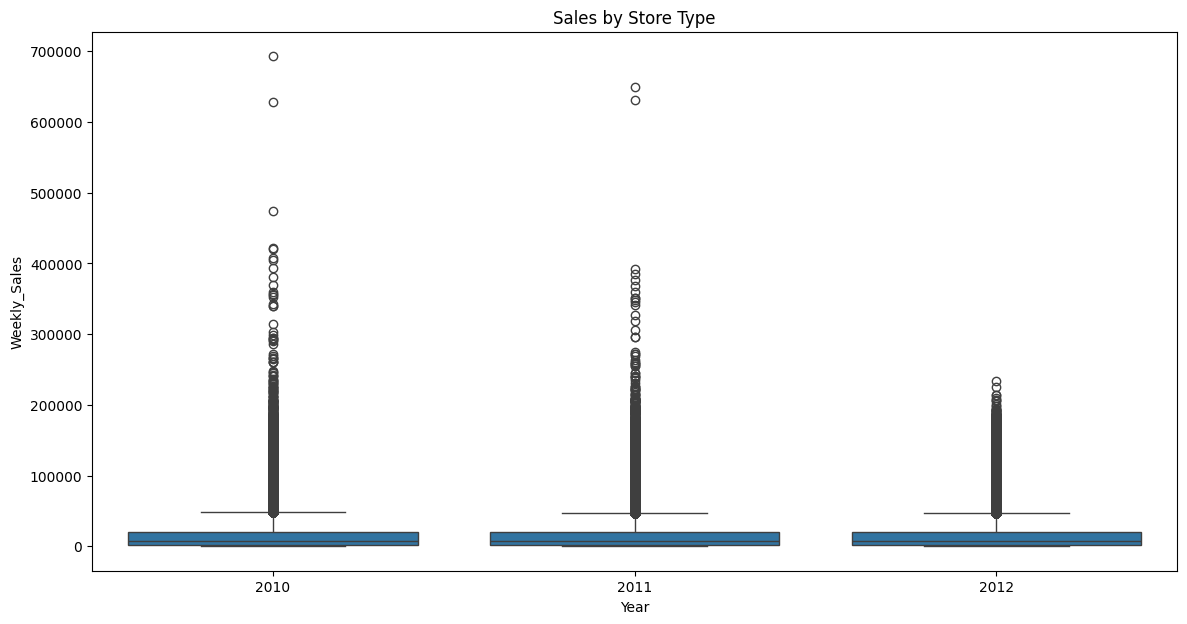

In [46]:
plt.figure(figsize=(14, 7))
sns.boxplot(data=pd_data, x='Year', y='Weekly_Sales')
plt.title('Sales by Store Type')
plt.show()

In [47]:
pd_data_ml=pd_data.copy()
pd_data_ml.drop(columns=["Markdown"],inplace=True)
pd_data_ml.isnull().sum()

Week                 0
Month                0
Year                 0
Store                0
Dept                 0
Type                 0
Weekly_Sales      1358
Size                 0
IsHoliday_y          0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
differ               0
dtype: int64

In [ ]:
def accuracy_score(x_train,x_test,y_train,y_test,algorithm):
    model=algorithm().fit(x_train,y_train)
    y_pred_train= model.predict(x_train)
    y_pred_test= model.predict(x_test)

    r2_score_train=r2_score(y_pred_train,y_train)
    r2_score_test= r2_score(y_pred_test,y_test)

    accuracy={"algorithm":algorithm,
              "R2_train":r2_score_train,
              "R2_test":r2_score_test}
    
    return accuracy

In [48]:
def ml_regressor(df,null_columns,lable):
    #droping the null columns
    df1=df.drop(columns=null_columns)

    #separate the null columns for lable
    df1_null=df1[df1[lable].isnull()]
    df1_null.reset_index(drop=True,inplace=True)

    #separate the notnull columns for lable
    df1_notnull= df1[df1[lable].notnull()]
    df1_notnull.reset_index(drop=True,inplace=True)

    # chooshig the x and y value for the ML using notnull dataframe
    x=df1_notnull.drop(columns=[lable,"differ"])
    y=df1_notnull[lable]

    #train_test_spliting
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

    #checking the ML models
    print(accuracy_score(x_train,x_test,y_train,y_test,DecisionTreeRegressor))
    print(accuracy_score(x_train,x_test,y_train,y_test,RandomForestRegressor))
    print(accuracy_score(x_train,x_test,y_train,y_test,AdaBoostRegressor))
    print(accuracy_score(x_train,x_test,y_train,y_test,ExtraTreesRegressor))
    print(accuracy_score(x_train,x_test,y_train,y_test,GradientBoostingRegressor))
    print(accuracy_score(x_train,x_test,y_train,y_test,XGBRegressor))

In [49]:
def RandomForest(df,null_columns,lable):
    #droping the null columns
    df1=df.drop(columns=null_columns)

    #separate the null columns for lable
    df1_null=df1[df1[lable].isnull()]
    df1_null.reset_index(drop=True,inplace=True)

    #separate the notnull columns for lable
    df1_notnull= df1[df1[lable].notnull()]
    df1_notnull.reset_index(drop=True,inplace=True)

    # chooshig the x and y value for the ML using notnull dataframe
    x=df1_notnull.drop(columns=[lable,"differ"])
    y=df1_notnull[lable]

    #train_test_spliting
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

    model=RandomForestRegressor().fit(x_train,y_train)
    y_pred= model.predict(x_test)

    #evaluatet the model
    mse=mean_squared_error(y_pred,y_test)
    rmse= np.sqrt(mse)
    mae=mean_absolute_error(y_pred,y_test)
    r2= r2_score(y_pred,y_test)

    metrics={"Mean_squared_error":mse,
             "Root_mean_squared_error":rmse,
             "Mean_absolute_error":mae,
             "R2_score":r2}
    
    print(metrics)
    
    #predict the null values for the df1_null dataframe
    test_data=df1_null.drop(columns=[lable,"differ"],axis=1)
    y_pred_null_df=model.predict(test_data)

    df1_null[lable]= pd.DataFrame(y_pred_null_df)

    df_result= pd.concat([df1_null,df1_notnull], axis=0, ignore_index=True)

    return df_result

In [50]:
pd_data_ml.columns

Index(['Week', 'Month', 'Year', 'Store', 'Dept', 'Type', 'Weekly_Sales',
       'Size', 'IsHoliday_y', 'Temperature', 'Fuel_Price', 'MarkDown1',
       'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI',
       'Unemployment', 'differ'],
      dtype='object')

In [51]:
pd_data_ml_1=RandomForest(pd_data_ml,['Weekly_Sales','MarkDown2','MarkDown3','MarkDown4','MarkDown5','CPI','Unemployment'],'MarkDown1')

{'Mean_squared_error': 2.615035741931738e-22, 'Root_mean_squared_error': 1.6171072141115868e-11, 'Mean_absolute_error': 8.972407393788361e-12, 'R2_score': 1.0}


In [54]:
pd_data_ml_2=RandomForest(pd_data_ml,['Weekly_Sales','MarkDown1','MarkDown3','MarkDown4','MarkDown5','CPI','Unemployment'],'MarkDown2')

{'Mean_squared_error': 0.00010566199011235315, 'Root_mean_squared_error': 0.010279201822726954, 'Mean_absolute_error': 9.745618370132837e-05, 'R2_score': 0.9999999999987869}


In [55]:
pd_data_ml_3=RandomForest(pd_data_ml,['Weekly_Sales','MarkDown1','MarkDown2','MarkDown4','MarkDown5','CPI','Unemployment'],'MarkDown3')

{'Mean_squared_error': 2.1627601226672965e-22, 'Root_mean_squared_error': 1.4706325586859882e-11, 'Mean_absolute_error': 2.0124835576186343e-12, 'R2_score': 1.0}


In [56]:
pd_data_ml_4=RandomForest(pd_data_ml,['Weekly_Sales','MarkDown2','MarkDown3','MarkDown5','CPI','Unemployment'],'MarkDown4')

{'Mean_squared_error': 9.554095824954978e-23, 'Root_mean_squared_error': 9.774505524554671e-12, 'Mean_absolute_error': 4.121246491521417e-12, 'R2_score': 1.0}


In [57]:
pd_data_ml_5=RandomForest(pd_data_ml,['Weekly_Sales','MarkDown2','MarkDown3','MarkDown4','CPI','Unemployment'],'MarkDown5')

{'Mean_squared_error': 0.0014260475279838768, 'Root_mean_squared_error': 0.03776304447451075, 'Mean_absolute_error': 0.0003337207436054628, 'R2_score': 0.9999999999591541}


In [58]:
pd_data_ml_1

,Week,Month,Year,Store,Dept,Type,Size,IsHoliday_y,Temperature,Fuel_Price,MarkDown1,differ
0,5,2,2010,1,1,0,151315,False,42.31,2.572,35088.6240,522010-1-1
1,6,2,2010,1,1,0,151315,True,38.51,2.548,12552.2749,622010-1-1
2,7,2,2010,1,1,0,151315,False,39.93,2.514,7143.1350,722010-1-1
3,8,2,2010,1,1,0,151315,False,46.63,2.561,7826.0610,822010-1-1
4,9,3,2010,1,1,0,151315,False,46.50,2.625,19399.0485,932010-1-1
...,...,...,...,...,...,...,...,...,...,...,...,...
421565,39,9,2012,45,98,1,118221,False,64.88,3.997,4556.6100,3992012-45-98
421566,40,10,2012,45,98,1,118221,False,64.89,3.985,5046.7400,40102012-45-98
421567,41,10,2012,45,98,1,118221,False,54.47,4.000,1956.2800,41102012-45-98
421568,42,10,2012,45,98,1,118221,False,56.47,3.969,2004.0200,42102012-45-98


In [59]:
pd_data_MD=pd_data_ml.drop(columns=["MarkDown1","MarkDown2","MarkDown3","MarkDown4","MarkDown5"],axis=1)

In [60]:
pd_data_MD=pd.merge(pd_data_MD,pd_data_ml_1[["MarkDown1","differ"]],on="differ",how="inner")
pd_data_MD=pd.merge(pd_data_MD,pd_data_ml_2[["MarkDown2","differ"]],on="differ",how="inner")
pd_data_MD=pd.merge(pd_data_MD,pd_data_ml_3[["MarkDown3","differ"]],on="differ",how="inner")
pd_data_MD=pd.merge(pd_data_MD,pd_data_ml_4[["MarkDown4","differ"]],on="differ",how="inner")
pd_data_MD=pd.merge(pd_data_MD,pd_data_ml_5[["MarkDown5","differ"]],on="differ",how="inner")

In [61]:
pd_data_MD

,Week,Month,Year,Store,Dept,Type,Weekly_Sales,Size,IsHoliday_y,Temperature,Fuel_Price,CPI,Unemployment,differ,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5
0,5,2,2010,1,1,0,24924.50,151315,False,42.31,2.572,211.096358,8.106,522010-1-1,35088.6240,1019.3724,321.3211,722.7861,3918.0434
1,6,2,2010,1,1,0,46039.49,151315,True,38.51,2.548,211.242170,8.106,622010-1-1,12552.2749,7982.8557,38859.3518,5064.4520,5048.1335
2,7,2,2010,1,1,0,41595.55,151315,False,39.93,2.514,211.289143,8.106,722010-1-1,7143.1350,12741.0151,320.7445,1099.9995,4020.2900
3,8,2,2010,1,1,0,19403.54,151315,False,46.63,2.561,211.319643,8.106,822010-1-1,7826.0610,4085.1367,343.3903,1003.1719,5414.2426
4,9,3,2010,1,1,0,21827.90,151315,False,46.50,2.625,211.350143,8.106,932010-1-1,19399.0485,3625.9744,343.3903,1114.1695,3871.9015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,39,9,2012,45,98,1,508.37,118221,False,64.88,3.997,192.013558,8.684,3992012-45-98,4556.6100,20.6400,1.5000,1601.0100,3288.2500
421566,40,10,2012,45,98,1,628.10,118221,False,64.89,3.985,192.170412,8.667,40102012-45-98,5046.7400,32.3054,18.8200,2253.4300,2340.0100
421567,41,10,2012,45,98,1,1061.02,118221,False,54.47,4.000,192.327265,8.667,41102012-45-98,1956.2800,33.6467,7.8900,599.3200,3990.5400
421568,42,10,2012,45,98,1,760.01,118221,False,56.47,3.969,192.330854,8.667,42102012-45-98,2004.0200,78.4527,3.1800,437.7300,1537.4900


In [63]:
pd_data_MD.dtypes

Week             UInt32
Month             int32
Year              int32
Store             int64
Dept              int64
Type              int64
Weekly_Sales    float64
Size              int64
IsHoliday_y        bool
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
differ           object
MarkDown1       float64
MarkDown2       float64
MarkDown3       float64
MarkDown4       float64
MarkDown5       float64
dtype: object

In [64]:
pd_data_MD_corr=pd_data_MD.drop(columns="differ").corr()

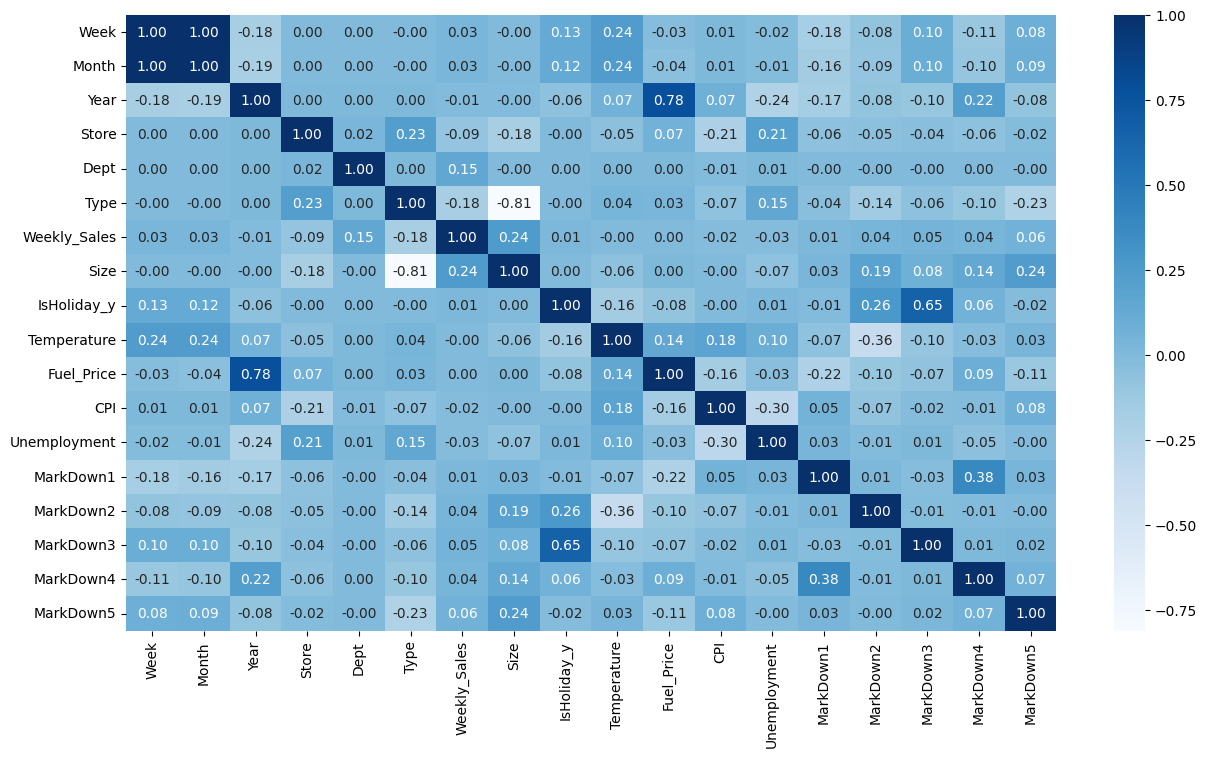

In [65]:
plt.figure(figsize=(15,8))
sns.heatmap(pd_data_MD_corr,annot=True,cmap="Blues",fmt=".2f")
plt.show()

In [67]:
pd_data_MD.isnull().sum()

Week               0
Month              0
Year               0
Store              0
Dept               0
Type               0
Weekly_Sales    1358
Size               0
IsHoliday_y        0
Temperature        0
Fuel_Price         0
CPI                0
Unemployment       0
differ             0
MarkDown1          0
MarkDown2          0
MarkDown3          0
MarkDown4          0
MarkDown5          0
dtype: int64

In [69]:
salesnull=pd_data_MD[pd_data_MD["Weekly_Sales"].isnull()]
salesnull.reset_index(drop=True,inplace=True)

sales_notnull= pd_data_MD[pd_data_MD["Weekly_Sales"].notnull()]
sales_notnull.reset_index(drop=True,inplace=True)

In [70]:
x=sales_notnull.drop(columns=['Weekly_Sales','differ'])
y=sales_notnull['Weekly_Sales']

In [71]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

model1=RandomForestRegressor().fit(x_train,y_train)
y_pred= model1.predict(x_test)

#evaluatet the model
mse=mean_squared_error(y_pred,y_test)
rmse= np.sqrt(mse)
mae=mean_absolute_error(y_pred,y_test)
r2= r2_score(y_pred,y_test)

metrics={"Mean_squared_error":mse,
            "Root_mean_squared_error":rmse,
            "Mean_absolute_error":mae,
            "R2_score":r2}

print(metrics)

{'Mean_squared_error': 13894132.113022242, 'Root_mean_squared_error': 3727.483348456736, 'Mean_absolute_error': 1470.8276486227287, 'R2_score': 0.9717920343056392}


In [80]:
df_data_m2= pd_data.copy()
df_data_m2=df_data_m2.drop(columns='Markdown')
df2=df_data_m2.drop(columns=['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5'])
df2.head(2)

,Week,Month,Year,Store,Dept,Type,Weekly_Sales,Size,IsHoliday_y,Temperature,Fuel_Price,CPI,Unemployment,differ
0,5,2,2010,1,1,0,24924.50,151315,False,42.31,2.572,211.096358,8.106,522010-1-1
1,6,2,2010,1,1,0,46039.49,151315,True,38.51,2.548,211.242170,8.106,622010-1-1


In [82]:
df2["IsHoliday_y"]= df2["IsHoliday_y"].map({False:0, True:1})

In [83]:
df2.head(2)

,Week,Month,Year,Store,Dept,Type,Weekly_Sales,Size,IsHoliday_y,Temperature,Fuel_Price,CPI,Unemployment,differ
0,5,2,2010,1,1,0,24924.50,151315,0,42.31,2.572,211.096358,8.106,522010-1-1
1,6,2,2010,1,1,0,46039.49,151315,1,38.51,2.548,211.242170,8.106,622010-1-1


In [77]:
def RandomForest(df,null_columns,lable):
    #droping the null columns
    df1=df.drop(columns=null_columns)

    #separate the null columns for lable
    df1_null=df1[df1[lable].isnull()]
    df1_null.reset_index(drop=True,inplace=True)

    #separate the notnull columns for lable
    df1_notnull= df1[df1[lable].notnull()]
    df1_notnull.reset_index(drop=True,inplace=True)

    # chooshig the x and y value for the ML using notnull dataframe
    x=df1_notnull.drop(columns=[lable,"differ"])
    y=df1_notnull[lable]

    #train_test_spliting
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

    model=RandomForestRegressor().fit(x_train,y_train)
    y_pred= model.predict(x_test)

    #evaluatet the model
    mse=mean_squared_error(y_pred,y_test)
    rmse= np.sqrt(mse)
    mae=mean_absolute_error(y_pred,y_test)
    r2= r2_score(y_pred,y_test)

    metrics={"Mean_squared_error":mse,
             "Root_mean_squared_error":rmse,
             "Mean_absolute_error":mae,
             "R2_score":r2}
    
    print(metrics)
    
    #predict the null values for the df1_null dataframe
    test_data=df1_null.drop(columns=[lable,"differ"],axis=1)
    y_pred_null_df=model.predict(test_data)

    df1_null[lable]= pd.DataFrame(y_pred_null_df)

    df_result= pd.concat([df1_null,df1_notnull], axis=0, ignore_index=True)

    return df_result

In [87]:
df2_ml= RandomForest(df2,[],'Weekly_Sales')

{'Mean_squared_error': 11570843.260939533, 'Root_mean_squared_error': 3401.594223439876, 'Mean_absolute_error': 1422.3291908201752, 'R2_score': 0.9767972250651987}


In [88]:
df2_ml.isnull().sum()

Week            0
Month           0
Year            0
Store           0
Dept            0
Type            0
Weekly_Sales    0
Size            0
IsHoliday_y     0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
differ          0
dtype: int64

In [66]:
pd_data_MD.head(2)

,Week,Month,Year,Store,Dept,Type,Weekly_Sales,Size,IsHoliday_y,Temperature,Fuel_Price,CPI,Unemployment,differ,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5
0,5,2,2010,1,1,0,24924.50,151315,False,42.31,2.572,211.096358,8.106,522010-1-1,35088.6240,1019.3724,321.3211,722.7861,3918.0434
1,6,2,2010,1,1,0,46039.49,151315,True,38.51,2.548,211.242170,8.106,622010-1-1,12552.2749,7982.8557,38859.3518,5064.4520,5048.1335
